In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from time import time

## 11.4
### 問 
次の問題インスタンスのそれぞれについて解を答えよ.  
 (a) TSP("a,b,3 b,c,2 c,d,1 d,e,2 e,a,1 b,d,5")  
 (b) TSPPATH("a,b,3 b,c,2 c,d,1 d,e,2 e,a,1 b,d,5 ; a c")  
 (c) SHORTESTPATH("a,b,3 b,c,2 c,d,1 d,e,2 e,a,1 b,d,5 ; a c")  
 (d) TSPPATH("a,b,3 b,c,2 c,d,1 d,e,2 e,a,1 b,d,5 ; a d")  

### 答
 (a) a, b, c, d, e  
 (b) a, e, d, b, c  
 (c) a, e, d, c  
 (d) no 



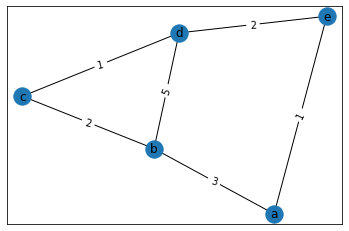

In [14]:
g = nx.Graph()
g.add_weighted_edges_from(
    [("a", "b", 3), ("b", "c", 2), ("c", "d", 1), ("d", "e", 2), ("e", "a", 1), ("b", "d", 5)]
    )
edge_labels = {(i, j): w['weight'] for i, j, w in g.edges(data=True)} 

pos = nx.spring_layout(g)
nx.draw_networkx_edge_labels(g, pos, edge_labels = edge_labels)
nx.draw_networkx(g, pos)
plt.show()

In [12]:
from tsp import tsp
from shortestPath import shortestPath
from tspPath_rev import tspPath

print("(a): ", tsp("a,b,3 b,c,2 c,d,1 d,e,2 e,a,1 b,d,5"))
print("(b): ", tspPath("a,b,3 b,c,2 c,d,1 d,e,2 e,a,1 b,d,5 ; a ; c"))
print("(c): ", shortestPath("a,b,3 b,c,2 c,d,1 d,e,2 e,a,1 b,d,5 ; a ; c"))
print("(d): ", tspPath("a,b,3 b,c,2 c,d,1 d,e,2 e,a,1 b,d,5 ; a ; d "))

(a):  a,b,c,d,e
(b):  a,e,d,b,c
(c):  4
(d):  no


## 11.9
### 問 
FIRD問題をFactorInRange問題の判定問題バージョンとする.  
 (a) FIRD問題を解くプログラムfird.pyを書け.  
 (b) 仮にfird.pyが多項式時間で実行されるものとする. この仮定のもとで, FactorInRange問題を多項式時間で解くプログラムFactorInRange.pyをかけ.  
 (c) Factor問題について同じ手順を踏むとどうなるか. つまり, Factor問題の判定問題バージョンを解く仮説的な多項式時間プログラムfactorD.pyが与えられたとき, 同じテクニックを使って非判定問題バージョンのFactor問題を多項式時間で解けるプログラムが得られるか.

In [2]:
from utils import WcbcException

def fird(inString):
    split = inString.split()

    if len(split) != 3:
        raise WcbcException("input must be composed of 3 numbers")

    M, a, b = int(split[0]), int(split[1]), int(split[2])
    
    if a > b:
        raise WcbcException("a must be equal to or smaller than b")
    
    for i in range(a, b + 1):
        if M % i == 0:
            return "yes"
    
    return "no"

In [4]:
print(fird("55 9 20"))
print(fird("55 9 12"))
print(fird("55 9 11"))
print(fird("55 9 10"))
print(fird("55 11 11"))


yes
yes
yes
no
yes


In [6]:
from fird import fird
# firdは多項式時間で実行されると仮定

def FactorInRange(inString):
    split = inString.split()

    if len(split) != 3:
        raise WcbcException("input must be composed of 3 numbers")

    M, a, b = int(split[0]), int(split[1]), int(split[2])
    
    if a > b:
        raise WcbcException("a must be equal to or smaller than b")
    
    # 入力文字数をnとするとrange(a, b + 1)における繰り返しの回数はたかだかlog(n)回
    # firdが多項式時間で解けるため, このループも多項式時間で解ける
    for i in range(a, b + 1):
        if fird(str(M) + " " + str(i) +  " " + str(i)) == "yes":
            return i
    
    return "no"

In [7]:
print(FactorInRange("55 9 20"))
print(FactorInRange("55 9 12"))
print(FactorInRange("55 9 11"))
print(FactorInRange("55 9 10"))
print(FactorInRange("55 11 11"))

11
11
11
no
11


(c) FactorD問題では因数を絞り込めないので同じ手順では多項式時間で解けるプログラムが構築できない.

## 11.14
### 問 
```factor('10000019')```と```factorUnary(10000019*'1')```の実行時間を計測せよ.
絶対実行時間と入力1文字あたりの実行時間を比較せよ.
どちらのプログラムの方が計算量が小さいか.
あなたの考えではどちらのプログラムが「効率的」か.

### 答
絶対実行時間はほとんど変わらないが, 入力1文字あたりの実行時間はfactorUnaryの方が速い.  
計算量はfactorは$O(n^2 10^n)$に対し, factorUnaryは$O((\log(n))^2 n)$である.  
本質的に解きたい問題に対して同程度の時間がかかっているため, 特に優劣はつけにくいが, 今回の例に関して言えばコードの作りがよりシンプルなfactorの方が効率的に感じる.


In [5]:
from factor import factor
from factorUnary import factorUnary

start_factor = time()
factor('10000019')
time_factor = time() - start_factor

start_factorUnary = time()
factorUnary(10000019*'1')
time_factorUnary = time() - start_factorUnary

print("factor: ", time_factor)
print("factorUnary: ", time_factorUnary)
print()
print("factor per input length: ", time_factor/len('10000019'))
print("factorUnary per input length: ", time_factorUnary/10000019)

factor:  0.7120635509490967
factorUnary:  0.7157924175262451

factor per input length:  0.08900794386863708
factorUnary per input length:  7.157910575232358e-08
